#### Amy Dong, Jordan Wolken <br> Data Bootcamp Final Project 

# Economic Growth and Crime Rates in New York City

### Executive Summary

In this project, we analyzed the correlation, if any, between economic growth and crime rate in New York City. We began with an overarching **hypothesis**: during periods of high economic growth, crime rates generally decrease. To test this assumption, we broke down our analysis into three parts: 
* First, we examined **aggregate, citywide crime data** for the seven major felonies in comparison to real GDP per capita growth and real median income growth. We then chose to stick with real median income growth as a more highly correlated predictor of crime rate.
* Second, we compared real median income growth to **citywide crime data by crime type**--violent vs. property--to isolate crimes motivated primarily by economic gain (e.g. stealing valuable property) from crimes often motivated by other, less obvious sociological and psychological motives (e.g. committing murder or rape). 
* Third, we examined **crime data by precinct** for property crimes specifically to isolate the effects of geographic clustering in terms of race, median income, gentrification, etc. By comparing property crime rates across various boroughs, we more effectively controlled for confounding variables that may not have been apparent in historical citywide data.

### Data

Using **Federal Reserve Economic Data (FRED)**, we measured economic growth from 2001 to 2017 with two metrics initially: 1) real GDP per capita, and 2) real median income. We then stuck with real median income as our measurement of economic growth because this variable more directly measures NYC residents' standards of living, while effects of GDP growth may not be as direct/more delayed. We acknowledge that real median income does not account for those who are not part of the census, e.g. homeless people in the city.

Using **New York Police Department crime statistics**, we measure crime rate by tracking seven major felonies offenses from 2000 to 2017, both citywide and by precinct. (*Note*: the seven major felonies include murder & non-negligent manslaughter, rape, robbery, felony assault, burglary, grand larceny, and grand larceny of motor vehicles. Grand larceny applies to situations in which property worth $1,000 or more is stolen.)

### Key Findings

Below, we briefly summarize the findings from our project. Each finding is explained more in depth later on.

**Part 1 - Aggregate Crime:**
On an aggregate, city-wide level, we do not find a statistically significant correlation between economic growth and crime rate growth. While the plots visually show a negative relationship between economic growth and crime growth, regression analysis indicates that other variables--such as population size, geographic differences, gentrification, welfare benefits, and local security--may have a more significant and direct influence on aggregate crime.

**Part 2 - Violent Crimes vs. Property-Based Crimes:**
On a city-wide level, we do not see a statisically significant relationship between real median income growth and violent crime growth. We see a slightly stronger relationship between real median income growth and property-based growth, perhaps because there are fewer confounding variables for crimes that are primarily motivated by economic gain. From 2010-2014, for example, we see a statistically significant, negative relationship between real median income growth and property-based crime growth. 

**Part 3 - Property-Based Crimes by Borough:** 
Brooklyn is the only borough that shows a statistically significant, negative relationship between real median income growth and property-based crime growth, both for the specific time period of 2010-2014, where income fluctuates the most in the studied time frame, and for the overall period 2002-2017.

**2018 Prediction:** We use this specific case--property-based crimes in Brooklyn--to hypothesize 2018 crime rate growth in this borough based on real median income growth. Assuming a 2018 real median income growth of -0.495% based on the 2017 rate, we predict that the 2018 crime growth rate in this borough will be 0.408% greater than in 2017, which comes out to **4,106** counts of burglary, **11,228** counts of grand larceny, **1909** counts of grand larceny of a motor vehicles, and **4,508** counts of robbery, with a total of **21,750** occurrences (up 88 counts from 21,662 in 2017). 

### Part 1: Aggregate, Citywide Crime Data and Economic Growth

In [426]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import datetime as dt                 # date functions 
import numpy as np                    # other mathematical functions
import matplotlib
import statsmodels.api as sm          # regressions and stats modeling
import statsmodels.formula.api as smf
%matplotlib inline

First, we read in historical crime data from NYPD archives (2000-2017).

In [3]:
# reading in historical crime data (2000-2017)
crime = pd.read_excel('/Users/amydong/Downloads/seven-major-felony-offenses-2000-2017.xls',
                         encoding='latin-1', 
                      error_bad_lines=False, 
                      skiprows=3,             # delete empty rows
                      skipfooter=8)           # delete footnotes

crime = crime.rename(columns=crime.iloc[0])   # set first row as column header
crime = crime.drop([0])                       # drop row (now column headers)
                                              # transpose such that row=year; column=crime
crime = crime.rename(columns={'OFFENSE':"year"}).set_index('year').T
crime.columns = map(str.lower, crime.columns) # lowercase columns

In [4]:
crime #summary of historical crime

,murder & non-negl. manslaughter,rape,robbery,felony assault,burglary,grand larceny,grand larceny of motor vehicle
2000,673,2068,32562,25924,38352,49631,35442
2001,649,1981,28202,23453,32763,46329,29531
2002,587,2144,27229,21147,31275,45771,26656
2003,597,2070,25989,19139,29110,46751,23413
2004,570,1905,24373,18622,26976,48763,20884
2005,539,1858,24722,17750,24117,48243,18246
2006,596,1525,23739,17309,23143,46625,15745
2007,496,1351,21809,17493,21762,44924,13174
2008,523,1299,22401,16284,20725,44242,12482
2009,471,1205,18601,16773,19430,39580,10670


**Historical Crime Data in NYC (2000-2017)**

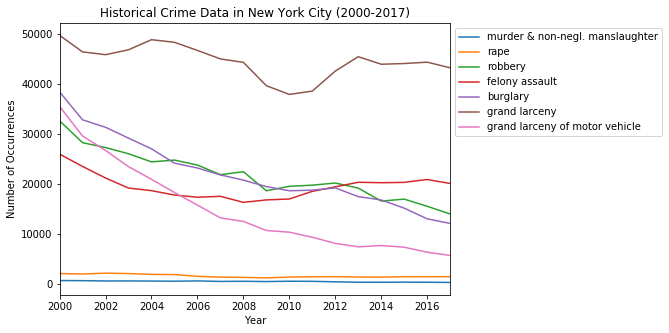

In [23]:
fig, ax=plt.subplots()
crime.plot(kind='line',
           ax=ax,
           figsize=(7,5))

ax.set_title('Historical Crime Data in New York City (2000-2017)')
ax.set_ylabel('Number of Occurrences')
ax.set_xlabel('Year')
ax.set_xlim(2000,2017)
ax.legend(bbox_to_anchor=(1, 1)) # moving legend out of plot

* We can see that, for most crimes, the number of occurrences decreases over time. The most common crimes are grand larceny, burglary, and robbert, with murder and rape being the least common.

* The graph below shows the changes in growth rates visually. While none have a clear linear trend, most fluctuate around the -5% growth rate. We will see this in the next plot, where we calculate the aggregate crime growth rate using total number of crimes.

**Historical Crime Growth in NYC (2000-2017)**

In [36]:
crime_growth = crime.pct_change() # growth rates of crime from 2000-2017
crime_growth = crime_growth.multiply(100) # as percentages

(2001, 2017)

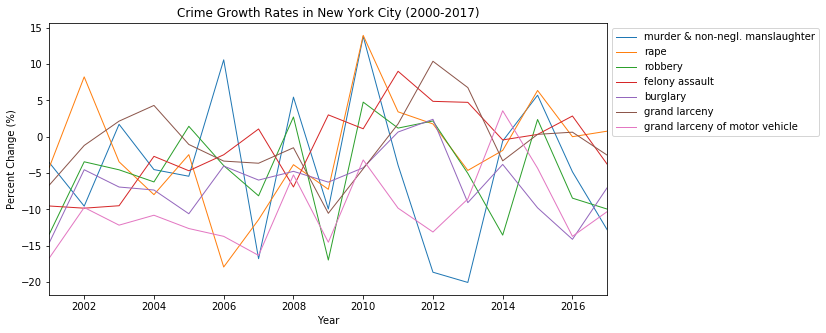

In [39]:
# plot showing annual growth rates for each of the seven major felonies
fig, ax=plt.subplots()
crime_growth.plot(kind='line',
           ax=ax,
           figsize=(10,5),
           linewidth=1)

ax.set_title('Crime Growth Rates in New York City (2000-2017)')
ax.set_ylabel('Percent Change (%)')
ax.set_xlabel('Year')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlim(2001,2017)

**Aggregate crime growth rate using total number of crimes:**

In [45]:
#average number of major felonies per year
allcrime = crime.T.mean()
allcrime

2000    26378.857143
2001    23272.571429
2002    22115.571429
2003    21009.857143
2004    20299.000000
2005    19353.571429
2006    18383.142857
2007    17287.000000
2008    16850.857143
2009    15247.142857
2010    15016.428571
2011    15238.428571
2012    15878.142857
2013    15905.000000
2014    15246.000000
2015    15064.714286
2016    14530.857143
2017    13808.285714
dtype: float64

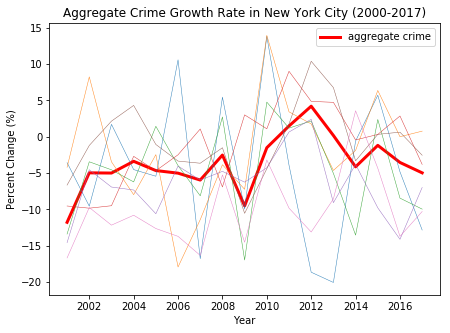

In [46]:
fig, ax=plt.subplots(figsize=(7,5))

#plot of aggregate annual crime growth rate
ax.plot(allcrime.pct_change().multiply(100),
        linewidth=3,
        color='red',
        label='aggregate crime')

#plot of individual crime annual growth rates
ax.plot(crime.pct_change().multiply(100),
        alpha=0.9,linewidth=0.5)
           
ax.set_title('Aggregate Crime Growth Rate in New York City (2000-2017)')
ax.set_ylabel('Percent Change (%)')
ax.set_xlabel('Year')
ax.legend()

* Between the years 2000-2011, the average crime rate decreases. Between 2011 and 2013 is the only time frame in which crime rate growth is positive. We can see that this is mostly due to a spike in grand larceny and felony assault (faded brown and red lines).

**Aggregate Crime Rate Growth vs. Economic Growth**

We now read in economic growth data (real GDP and real median income) from FRED:

In [47]:
#reading in real GDP per capita data in New York City from 2001-2017
rgdp = pd.read_csv('/Users/amydong/Downloads/nyc_rgdp_2001_2017.csv',
                         encoding='latin-1')
rgdp = rgdp.rename(columns={'DATE':'year', 'PCRGMP35620':'rgdp'})   # more intuitive column names
rgdp['year'] = rgdp['year'].str[:4]                                 # instead of 2001-01-01, use 2001
rgdp['year'] = rgdp.astype(int)
rgdp = rgdp.set_index('year')

#reading in real median income data in New York City from 2000-2017
rincome = pd.read_csv('/Users/amydong/Downloads/nyc_rmedianincome_2000_2017.csv',
                            encoding = 'latin-1')
rincome = rincome.rename(columns={'DATE':'year', 'MEHOINUSNYA672N':'rmed_income'})   # more intuitive column names
rincome['year'] = rincome['year'].str[:4]                                 # instead of 2001-01-01, use 2001
rincome['year'] = rincome.astype(int)
rincome = rincome.set_index('year')

In [48]:
rincome = rincome.drop(2000) #to match size of rgdp array, which is from 2001-2017

In [49]:
econ = pd.concat([rincome,rgdp],axis=1) #combine both measures of economic growth into a single dataframe

In [53]:
econ_pct = econ.pct_change().multiply(100)
econ_pct = econ_pct.rename(columns={'rmed_income':'income_growth', 'rgdp':'rgdp_growth'})
econ2 = pd.concat([econ, econ_pct],axis=1) #combine the two measures of economic growth
econ2

,rmed_income,rgdp,income_growth,rgdp_growth
year,,,,
2001,58451,61229,NaN,NaN
2002,57342,60917,-1.897316,-0.509562
2003,57167,61018,-0.305186,0.165799
2004,58084,62720,1.604072,2.789341
2005,59361,65318,2.198540,4.142219
2006,58772,67249,-0.992234,2.956306
2007,58007,68073,-1.301640,1.225297
2008,57592,65711,-0.715431,-3.469804
2009,57513,65564,-0.137172,-0.223707


The following plots show real median income and real GDP over time, as well as annual growth rates.

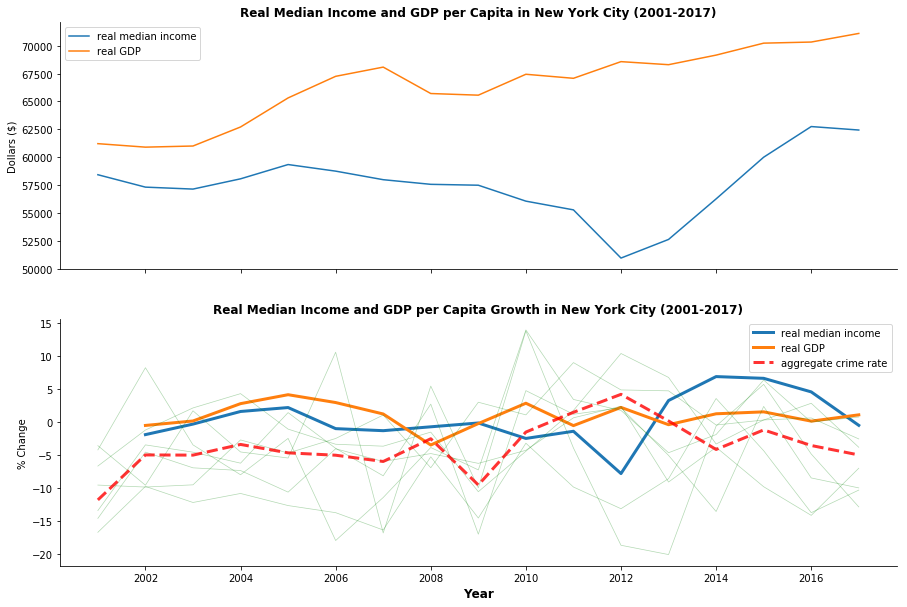

In [198]:
fig, ax = plt.subplots(2, sharex=True, figsize=(15,10))

#plot of real median income and real GDP values (in dollars $)
ax[0].plot(econ['rmed_income'],label='real median income')
ax[0].plot(econ['rgdp'],label='real GDP')
ax[0].set_title('Real Median Income and GDP per Capita in New York City (2001-2017)',fontweight='bold')
ax[0].set_ylabel('Dollars ($)')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend()

#plot of annual growth rates
ax[1].plot(econ_pct['income_growth'],label='real median income',linewidth=3)
ax[1].plot(econ_pct['rgdp_growth'],label='real GDP',linewidth=3)

ax[1].plot(crime.pct_change().multiply(100),alpha=0.3,
           color='green',
           linewidth=0.7)
ax[1].plot(allcrime.pct_change().multiply(100),alpha=0.8,
           color='red',
           label='aggregate crime rate',
           linewidth=3,
           linestyle='--')
ax[1].set_title('Real Median Income and GDP per Capita Growth in New York City (2001-2017)',fontweight='bold')
ax[1].set_ylabel('% Change')
ax[1].set_xlabel('Year',size=12,fontweight='bold')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend()

**Economic Growth Analysis**
* Over time, real GDP in New York City has grown steadily. We do not believe this would be the best measurement to identify correlation between rising/falling crime rates because it may not have as direct an impact on NYC residents (or have a delayed response). Annual real median income, however, is more dynamic. It is mostly stable from 2000 to 2008 (modest decline), with a more extreme decline from 2008 to 2012, most likely due to the effects of the housing bubble and financial crisis. Income then grows significantly from 2012-2016 before stabilizing, from around 52,500 USD to 62,500 USD. 

** Economic Growth vs. Aggregate Crime Analysis**
* On average, aggregate crime decreased around a steady 5% from 2002 to 2008, which appears to be in line with more stable real median income growth rate during that period. Aggregate crime then decreases significantly from 2008-2009, but then grows and even turns positive during the years 2009-2013. Based on the second graph, we see that this growth correlates more closely with the sharp drop in real median income during the time, which suggests that real median income is a better empirical "tracker" of the crime growth rate. The sharp rise in real median income following 2012 seems to match the post-2013 drop in aggregate crime rate (turns negative once again), with both rates becoming more stable from 2015-2017.

### Part 1b: 
**Linear Regression Analysis**

* In addition to a visualization of the data, we also performed a basic stats analysis on the aggregate economic growth and crime data to identify any correlation and/or if this was statistically significant. 

In [425]:
# real median income growth vs. aggregate crime growth from 2002-2017
x = econ_pct['income_growth'].drop([2001])           
y = allcrime.pct_change().multiply(100).drop([2000, 2001])

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.189
Date:                Sun, 16 Dec 2018   Prob (F-statistic):              0.293
Time:                        21:27:49   Log-Likelihood:                -46.020
No. Observations:                  16   AIC:                             94.04
Df Residuals:                      15   BIC:                             94.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
income_growth    -0.3370      0.309     -1.091      0.293      -0.996       0.322
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   0.575
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.309
Skew:                          -0.143   Prob(JB):                        0.857
Kurtosis:                       2.382   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Further Interpretation of Regression Results:**
* The slope of -0.3370 implies that **median income has a negative relationship with overall crime.** This was generally in line with what we predicted.
* Our p value of 0.293 indicates that **the effect of a rise in median income is not statistically significant** (using p<0.05 as a rejection rule). 
* The R-squared value of 0.073 indicates that **around 7% of variation in overall crime reduction is explained by a rise in median income**

* In conclusion, at the aggregate level, there is indeed a **general negative relationship between real median income growth and aggregate crime growth.** However, these results were **not statistically significant** results due to potential confounding variables, which suggests that **our hypothesis is not likely the best or the only explanation for a rise or fall in crime rates.** Real income growth is more likely one of several factors, such as welfare benefits, number of police, number of non-profits committed to ending crime, community demographics, and others.

One additional thing to note is the small n-value. While we used 16 data points for our regression, more data points might have allowed our test to be more accurate.

### Part 2: Crime Data by Type (Violent vs. Property) vs. Real Median Income

While comparing aggregate crime data with economic growth is useful in identifying overarching trends, we **hypothesize that property-based crimes** (robbery, burglary, grand larceny, and grand larceny of a motor vehicle) are **more correlated to economic growth than violent crimes** (rape, murder & manslaughter, and felony assault). 
* Our initial reasoning: Property-based crimes clearly involve economic gain (e.g. stealing valuable property), while violent crimes often have less obvious sociological and psychological motives. The latter may also be correlated to economic growth, but we believe there are fewer confounding variables to account for when studying property-specific crimes.

In [74]:
#splitting up data by crime type
violent_crime = crime[['murder & non-negl. manslaughter','rape','felony assault']]
property_crime = crime[['robbery','burglary','grand larceny','grand larceny of motor vehicle']]

**Historical Data by Crime Type (2000-2017)**

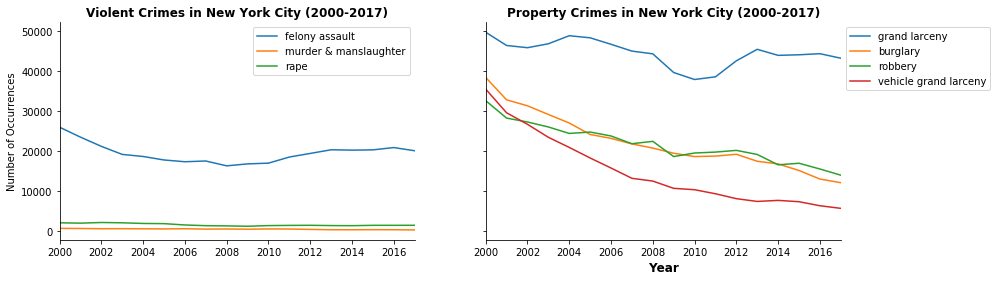

In [327]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(14,4))

#plot of violent crime occurrences
ax[0].plot(violent_crime['felony assault'],label='felony assault')
ax[0].plot(violent_crime['murder & non-negl. manslaughter'],label='murder & manslaughter')
ax[0].plot(violent_crime['rape'],label='rape')
ax[0].set_title('Violent Crimes in New York City (2000-2017)',fontweight='bold')
ax[0].set_ylabel('Number of Occurrences')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend()
ax[0].set_xlim(2000,2017)

#plot of property crime occurrences
ax[1].plot(property_crime['grand larceny'],label='grand larceny')
ax[1].plot(property_crime['burglary'],label='burglary')
ax[1].plot(property_crime['robbery'],label='robbery')
ax[1].plot(property_crime['grand larceny of motor vehicle'],label='vehicle grand larceny')
ax[1].set_title('Property Crimes in New York City (2000-2017)',fontweight='bold')
ax[1].set_xlabel('Year',size=12,fontweight='bold')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend()
ax[1].set_xlim(2000,2017)
ax[1].legend(bbox_to_anchor=(1, 1))

Grand larceny is the most common property crime (2x felony assault, which is the largest crime for violent crimes).

**Historical Crime Growth by Crime Type (2002-2017)**

In [126]:
#growth rates of each type of violent and property crime
violent_crime_growth = violent_crime.pct_change().multiply(100) 
property_crime_growth = property_crime.pct_change().multiply(100) 

In [133]:
#aggregate growth rates for violent crimes and property crimes
all_violent_crime_growth = violent_crime.T.mean().pct_change().multiply(100)
all_property_crime_growth = property_crime.T.mean().pct_change().multiply(100)

(2001, 2017)

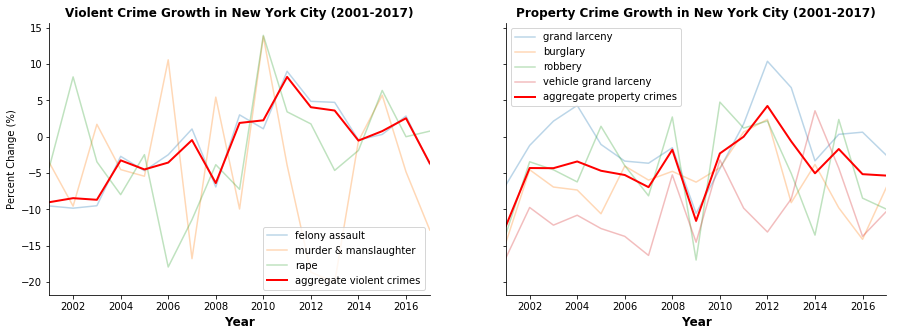

In [427]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

#plot of violent crime occurrences
ax[0].plot(violent_crime_growth['felony assault'],
           label='felony assault',
           alpha=0.3)
ax[0].plot(violent_crime_growth['murder & non-negl. manslaughter'],
           label='murder & manslaughter',
           alpha=0.3)
ax[0].plot(violent_crime_growth['rape'],
           label='rape',
           alpha=0.3)
ax[0].plot(all_violent_crime_growth,
           label='aggregate violent crimes',
           linewidth=2,color='red')
ax[0].set_title('Violent Crime Growth in New York City (2001-2017)',fontweight='bold')
ax[0].set_ylabel('Percent Change (%)')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend()
ax[0].set_xlabel('Year',size=12,fontweight='bold')
ax[0].set_xlim(2001,2017)

#plot of property crime occurrences
ax[1].plot(property_crime_growth['grand larceny'],label='grand larceny',alpha=0.3)
ax[1].plot(property_crime_growth['burglary'],label='burglary',alpha=0.3)
ax[1].plot(property_crime_growth['robbery'],label='robbery',alpha=0.3)
ax[1].plot(property_crime_growth['grand larceny of motor vehicle'],
           label='vehicle grand larceny',
           alpha=0.3)
ax[1].plot(all_property_crime_growth,
           label='aggregate property crimes',
           linewidth=2,color='red')
ax[1].set_title('Property Crime Growth in New York City (2001-2017)',fontweight='bold')
ax[1].set_xlabel('Year',size=12,fontweight='bold')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend()
ax[1].set_xlim(2001,2017)

(2002, 2017)

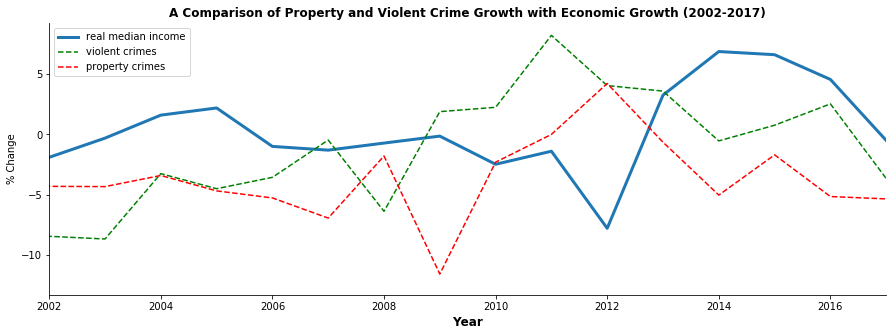

In [428]:
fig, ax = plt.subplots(figsize=(15,5))

#plot of annual growth rates
ax.plot(econ_pct['income_growth'],label='real median income',linewidth=3) #sticking with real median income
ax.plot(all_violent_crime_growth,
           color='green',
           label = 'violent crimes',
           linewidth=1.5,
           linestyle='--')
ax.plot(all_property_crime_growth,
           color='red',
           label='property crimes',
           linewidth=1.5,
           linestyle='--')
ax.set_title('A Comparison of Property and Violent Crime Growth with Economic Growth (2002-2017)',fontweight='bold')
ax.set_ylabel('% Change')
ax.set_xlabel('Year',size=12,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
ax.set_xlim(2002,2017)

** Economic Growth vs. Property Crime/Violent Crime Analysis**
* Based on the plot above, there seems to be a **higher negative correlation between property crimes and real median income** than violent crimes and real median income. 
* **Observations:**
     * When income rises at 2005 and 2009, we see similar declines in property crimes, while violent crimes actually grow during a growth in median income in 2008-2009. When there is a substantial decline in real median income from 2011-2012, we see a similar increase in property crimes. 
     * Violent crimes generally map the negative pattern of real income growth, but it is often at a lag or "earlier" than the trend compared to the growth in property crimes. Overall, however, both still appear to be generally negatively correlated.

### Part 2b:
**Linear Regression Test: Violent Crime Growth Rate (2002-2017)**
* Next, we ran a linear regressions to see if real median income was a significant predictor of violent crime from 2002-2017.

In [32]:
# real median income growth vs. violent crime growth from 2002-2017
x = econ_pct['income_growth'].drop([2001])
y = all_violent_crime_growth.drop([2000, 2001])

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                   0.02061
Date:                Sun, 16 Dec 2018   Prob (F-statistic):              0.888
Time:                        17:40:24   Log-Likelihood:                -47.548
No. Observations:                  16   AIC:                             97.10
Df Residuals:                      15   BIC:                             97.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
income_growth    -0.0488      0.340     -0.144      0.888      -0.773       0.676
==============================================================================
Omnibus:                        0.198   Durbin-Watson:                   0.739
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.397
Skew:                          -0.031   Prob(JB):                        0.820
Kurtosis:                       2.231   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Linear Regression Results for Violent Crimes:**
* The slope of -0.0488 implies that **median income has a slight negative relationship with violent crime,** but the p value of 0.888 indicates that **the effect of a rise in median income is not statistically significant** (using p<0.05 as a rejection rule). 
* The R-squared value of 0.001 indicates that **around .1% of variation in violent crime reduction is explained by a rise in median income.**

* Overall, it seems as though **real median income is not a good predictor of violent crime rates in New York City.** The extremely low correlation, even compared to our results from Part 1, suggest other variables--perhaps population density, number of police, criminal law statutes, or political instability--are better predictors of the violent crime growth rate. 

**A Closer Look at 2010-2014...**

While these results were not very encouraging, we took a closer look at the data and decided to use 2010-2014 for both the independent and dependent variables. These 5 years witnessed the biggest fluctuations in median income, which we thought would have a more significant effect on crime. The results of that linear regression are as follows:

In [33]:
x = econ_pct['income_growth'].drop([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2015, 2016, 2017])
y = all_violent_crime_growth.drop([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2015, 2016, 2017])

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                    0.5797
Date:                Sun, 16 Dec 2018   Prob (F-statistic):              0.489
Time:                        17:41:04   Log-Likelihood:                -14.307
No. Observations:                   5   AIC:                             30.61
Df Residuals:                       4   BIC:                             30.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
income_growth    -0.3198      0.420     -0.761      0.489      -1.486       0.846
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.084
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.772
Skew:                           0.849   Prob(JB):                        0.680
Kurtosis:                       2.093   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Linear Regression Results for Violent Crimes (2010-2014)**
* The p value of 0.489 indicates that **the relationship between real median income and crime rate is still not statistically significant, although less so** (using p<0.05 as a rejection rule). The R-squared value of 0.127 indicates that **around 13% of variation in violent crime reduction is explained by a rise in median income,** which, although low, is much higher than 0.1% from the previous analysis. 

* These findings suggest that the **relationship between economic growth and crime rate in NYC is extremely sensitive to the time frame used**. The period of 2010-2014 showed a period of extreme fluctuation in real median income, perhaps due to inflation and other FED policies after the 2008 financial crisis. This adjustment in people's income may have had a more direct effect on crime rates than other periods. While the correlation is stronger in this period, however, we sitll cannot conclusively draw a cause-effect relationship. 

**Linear Regression Test: Property-Based Crime Growth Rate (2002-2017)**
* Next, we ran a simple linear regression to see if real median income was a significant predictor of property crime from 2002-2017.

In [34]:
x = econ_pct['income_growth'].drop([2001])
y = property_crime.T.mean().pct_change().multiply(100).drop([2000, 2001])

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.486
Date:                Sun, 16 Dec 2018   Prob (F-statistic):              0.242
Time:                        17:42:00   Log-Likelihood:                -47.520
No. Observations:                  16   AIC:                             97.04
Df Residuals:                      15   BIC:                             97.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
income_growth    -0.4137      0.339     -1.219      0.242      -1.137       0.310
==============================================================================
Omnibus:                        3.197   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                1.387
Skew:                          -0.680   Prob(JB):                        0.500
Kurtosis:                       3.479   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Linear Regression Results for Property-Based Crimes:**
* The slope of -0.4137 implies that **real median income has a greater negative relationship on property crime than violent crime.** Even though this test is also statistically insignificant, it is still stronger than that for violent crimes.
* The R-squared value of 0.090 indicates that **around 9% of variation in property crime reduction is explained by a rise in median income.**

**A Closer Look at 2010-2014...**

Again, we took a closer look at the years 2010-2014 for property crimes as well.

In [35]:
x = econ_pct['income_growth'].drop([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2015, 2016, 2017])
y = property_crime.T.mean().pct_change().multiply(100).drop([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2015, 2016, 2017])

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     7.775
Date:                Sun, 16 Dec 2018   Prob (F-statistic):             0.0494
Time:                        17:42:53   Log-Likelihood:                -10.098
No. Observations:                   5   AIC:                             22.20
Df Residuals:                       4   BIC:                             21.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
income_growth    -0.5048      0.181     -2.788      0.049      -1.007      -0.002
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.974
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.407
Skew:                          -0.513   Prob(JB):                        0.816
Kurtosis:                       2.051   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Linear Regression Results for Property Crimes (2010-2014)**
* The slope of -0.5048 implies that **real median income has a stronger negative relationship with property crime** than violent crime.
* The p value of 0.049 indicates that the effect of a rise in median income is **statistically significant** (using p<0.05 as a rejection rule). 
* The R-squared value of 0.660 indicates that **around 66% of variation in property crime reduction is explained by a rise in median income**


In this case alone **from 2010-2014,** the stats model indicates that **real median income growth seems to be a moderately strong empirical predictor of property crime growth in NYC.** 

### Conclusion from Part 2:

While our **original hypothesis lacks strong statistical evidence,** i.e. we cannot state with confidence that real median income is strongly correlated with aggregate crime growth, we _can_ state with some confidence that **real median income is moderately negatively correlated with property-based crimes** at a statistically significant level from 2010-2014, and is generally more of factor in predicting property-based crimes across 2002-2017 as opposed to violent crimes. 

* Given our only statistically significant relationship so far was drawn from real median income growth and property crime rate growth, we turn to Part 3, where we identify any potential relationship between median income growth and property-based crime growth across 4 New York City boroughs. 

### Part 3: Property-Based Crime Growth vs. Real Median Income Growth By Borough

Some background data:

**Manhattan**: 1st-34th Precincts | **Bronx**: 40th-52nd Precincts | **Brooklyn**: 60th-94th Precincts | **Queens**: 100th-115th Precincts

In [292]:
# reading in historical crime data by precinct from 2000-2017
crime_pct = pd.read_excel('/Users/amydong/Downloads/seven-major-felony-offenses-by-precinct-2000-2017.xls',
                         encoding='latin-1', 
                      error_bad_lines=False, 
                      skiprows=1,                  # delete empty rows
                      skipfooter=44)               # delete footnotes at bottom

crime_pct = crime_pct.rename(columns=crime_pct.iloc[0])     # set correct row as new column header
crime_pct = crime_pct.drop([0])                             # drop row (now column headers)
                                                            # transpose such that row = year; column = crime
crime_pct = crime_pct.fillna(method='ffill')                # forward fill in precinct values
crime_pct = crime_pct.astype({"PCT": str, "CRIME": str}) 
crime_pct['CRIME'] = crime_pct['CRIME'].str.lower() 
crime_pct = crime_pct[crime_pct.CRIME 
         != 'total seven major felony offenses']            # deleting totals
crime_pct = crime_pct.set_index('PCT')

In [429]:
# data for precincts 1-34
manhattan = crime_pct.iloc[0:154].set_index('CRIME').T      # precincts 1-34
manhattan.columns = manhattan.columns.str.replace(' ', '')  # remove extra spaces in column names
bronx = crime_pct.iloc[155:238].set_index('CRIME').T        # precincts 40-52
bronx.columns = bronx.columns.str.replace(' ', '')
brooklyn = crime_pct.iloc[239:399].set_index('CRIME').T     # precincts 60-94
brooklyn.columns = brooklyn.columns.str.replace(' ', '')
queens = crime_pct.iloc[400:511].set_index('CRIME').T       # precincts 100-115
queens.columns = queens.columns.str.replace(' ', '')  

#summing data by crime type across Manhattan precincts
manhattan = manhattan.groupby(axis=1,by=manhattan.columns).sum()
man_prop = manhattan[['burglary','grandlarceny','grandlarcenyofmotorvehicle','robbery']]
man_prop_growth = man_prop.T.mean().pct_change().multiply(100)

bronx = bronx.groupby(axis=1,by=bronx.columns).sum()
brx_prop = bronx[['burglary','grandlarceny','grandlarcenyofmotorvehicle','robbery']]
brx_prop_growth = brx_prop.T.mean().pct_change().multiply(100)

brooklyn = brooklyn.groupby(axis=1,by=brooklyn.columns).sum()
bkn_prop = brooklyn[['burglary','grandlarceny','grandlarcenyofmotorvehicle','robbery']]
bkn_prop_growth = bkn_prop.T.mean().pct_change().multiply(100)

queens = queens.groupby(axis=1,by=queens.columns).sum()
qns_prop = queens[['burglary','grandlarceny','grandlarcenyofmotorvehicle','robbery']]
qns_prop_growth = qns_prop.T.mean().pct_change().multiply(100)

#converting crime totals to growth rates
all_violent_crime_growth = violent_crime.T.mean().pct_change().multiply(100)

**Real Median Income Growth vs. Property Crime Growth Across 4 NYC Boroughs**

(2002, 2017)

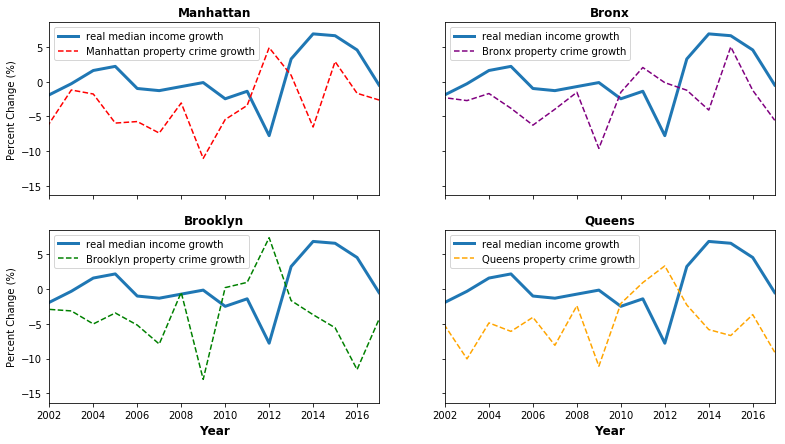

In [462]:
fig, ax = plt.subplots(2,2,sharex='all', sharey='all',figsize=(13,7))

#real median income growth vs. Manhattan property crime growth
ax[0,0].plot(econ_pct['income_growth'],label='real median income growth',linewidth=3) 
ax[0,0].plot(man_prop_growth, color='red', label='Manhattan property crime growth',
           linewidth=1.5,linestyle='--')
ax[0,0].set_ylabel('Percent Change (%)')
ax[0,0].set_title('Manhattan',fontweight='bold')
ax[0,0].legend()

#vs. Bronx property crime growth
ax[0,1].plot(econ_pct['income_growth'],label='real median income growth',linewidth=3) 
ax[0,1].plot(brx_prop_growth, color='purple', label='Bronx property crime growth',
           linewidth=1.5, linestyle='--')
ax[0,1].set_title('Bronx',fontweight='bold')
ax[0,1].legend()

#vs. Brooklyn property crime growth
ax[1,0].plot(econ_pct['income_growth'],label='real median income growth',linewidth=3) 
ax[1,0].plot(bkn_prop_growth, color='green', label='Brooklyn property crime growth',
           linewidth=1.5, linestyle='--')
ax[1,0].set_ylabel('Percent Change (%)')
ax[1,0].set_title('Brooklyn',fontweight='bold')
ax[1,0].legend()

#vs. Queens property crime growth
ax[1,1].plot(econ_pct['income_growth'],label='real median income growth',linewidth=3) 
ax[1,1].plot(qns_prop_growth, color='orange', label='Queens property crime growth',
           linewidth=1.5,linestyle='--')
ax[1,1].set_title('Queens',fontweight='bold')
ax[1,1].legend()

#ax[0,0].set_ylabel('Percent Change (%)')
ax[1,0].set_xlabel('Year',size=12,fontweight='bold')
ax[1,1].set_xlabel('Year',size=12,fontweight='bold')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.legend()
ax[0,0].set_xlim(2002,2017)

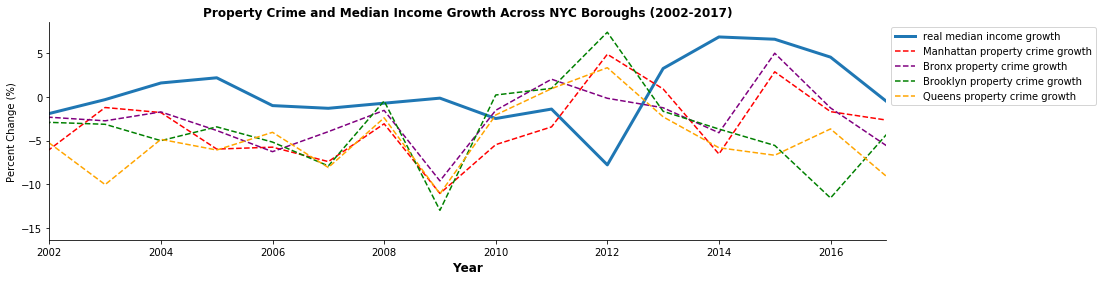

In [463]:
#aggregate plot:
fig, ax = plt.subplots(figsize=(15,4))


ax.plot(econ_pct['income_growth'],label='real median income growth',linewidth=3)  # rmed income
ax.plot(man_prop_growth, color='red', label='Manhattan property crime growth',   # Manhattan
           linewidth=1.5,linestyle='--')
ax.plot(brx_prop_growth, color='purple', label='Bronx property crime growth',    # Bronx
           linewidth=1.5, linestyle='--')   
ax.plot(bkn_prop_growth, color='green', label='Brooklyn property crime growth',  # Brooklyn
           linewidth=1.5, linestyle='--')
ax.plot(qns_prop_growth, color='orange', label='Queens property crime growth',   # Queens
           linewidth=1.5,linestyle='--')
ax.set_title('Property Crime and Median Income Growth Across NYC Boroughs (2002-2017)',fontweight='bold')
ax.set_ylabel('Percent Change (%)')
ax.set_xlabel('Year',size=12,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
ax.set_xlim(2002,2017)
ax.legend(bbox_to_anchor=(1, 1))

**Analysis of Real Median Income vs. Property Crimes Across Boroughs**
* Based on the individual plots above, **Brooklyn seems to have the strongest inverse relationship** between real median income growth and property crime rate. 
* Based on the aggregate plot, we see that **between 2008-2010, all four boroughs experienced a sharp decline in property crimes,** while **between 2011-2013, all experienced a relative increase in crime rate before it dipped back down again.** These are **correlated with a slight increase in median income growth** and a sharp **decrease and subsequent increase in median income growth** respectively. 
* The years will **most fluctuation include 2002-2004 and 2014 onwards**. While the property crime rate growth turned positive in 2015 and ended higher than at the beginning of 2014 in both Manhattan and the Bronx, the property crime rates in both Brooklyn and Queens decreased overall.

### Part 3b: Linear Regression Analysis

* After visualizing the data across the 4 boroughs and making some initial observations on trends, we then performed **linear regression tests for each borough** to identify whether real median income growth had an statistically significant correlation with property crime growth. 
* We tested for the **overall time period 2002-2017** for all four boroughs and then the **previously significant time period 2010-2014** for Brooklyn alone, which was the only borough to show a statistically significant relationship between the two metrics as predicted above based on plot visualization.

The results, with corresponding analysis, can be seen below.

**Linear Regression Tests for Each Borough (2002-2017)** 

In [464]:
#Manhattan
x = econ_pct['income_growth'].drop([2001])
y = man_prop.T.mean().pct_change().multiply(100).drop([2000, 2001])

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.2044
Date:                Mon, 17 Dec 2018   Prob (F-statistic):              0.658
Time:                        00:02:24   Log-Likelihood:                -48.823
No. Observations:                  16   AIC:                             99.65
Df Residuals:                      15   BIC:                             100.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
income_growth    -0.1664      0.368     -0.452      0.658      -0.951       0.618
==============================================================================
Omnibus:                        0.155   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.925   Jarque-Bera (JB):                0.222
Skew:                           0.184   Prob(JB):                        0.895
Kurtosis:                       2.556   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Manhattan Regression Results**
* The slope of -0.1664 implies that **real median income has a small negative relationship with property crime.** However, this test is **not statistically significant** (using p<0.05 as a rejection rule), and the R-squared value indicates that **only around 1% of variation in property crime reduction is explained by a rise in median income.**

In [465]:
#Bronx
x = econ_pct['income_growth'].drop([2001])
y = brx_prop.T.mean().pct_change().multiply(100).drop([2000, 2001])

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                   0.01736
Date:                Mon, 17 Dec 2018   Prob (F-statistic):              0.897
Time:                        00:02:35   Log-Likelihood:                -45.114
No. Observations:                  16   AIC:                             92.23
Df Residuals:                      15   BIC:                             93.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
income_growth     0.0385      0.292      0.132      0.897      -0.584       0.661
==============================================================================
Omnibus:                        1.391   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                0.173
Skew:                           0.041   Prob(JB):                        0.917
Kurtosis:                       3.503   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Bronx Regression Results**
* The slope of 0.0385 implies that **median income has a slight positive effect on property crime,** which is the opposite of what our original hypothesis predicted--most likely due again to other variables not analyzed in this specfic dataset. Again, however, this relationship is  **statistically insignificant** (using p<0.05 as a rejection rule). The R-squared value of 0.001 indicates that **only around .1% of variation in property crime reduction is explained by a rise in median income**--essentially a very weak relationship if one indeed exists.

In [466]:
#Brooklyn
x = econ_pct['income_growth'].drop([2001])
y = bkn_prop.T.mean().pct_change().multiply(100).drop([2000, 2001])

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     4.864
Date:                Mon, 17 Dec 2018   Prob (F-statistic):             0.0434
Time:                        00:02:45   Log-Likelihood:                -49.046
No. Observations:                  16   AIC:                             100.1
Df Residuals:                      15   BIC:                             100.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
income_growth    -0.8233      0.373     -2.205      0.043      -1.619      -0.028
==============================================================================
Omnibus:                        3.247   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                1.844
Skew:                          -0.831   Prob(JB):                        0.398
Kurtosis:                       3.064   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Brooklyn Regression Results**
* The slope of -0.8233 implies that **median income has a negative, almost 1:1 relationship with property crime.**

* For Brooklyn alone, **the effect of a rise in median income is statistically significant** (using p<0.05 as a rejection rule). 

* The R-squared value of 0.245 indicates that **around 25% of variation in property crime reduction is explained by a rise in median income.** As seen above in the plots, Brooklyn does indeed show the most correlation between real median income growth and property crime growth.

In [467]:
#Queens
x = econ_pct['income_growth'].drop([2001])
y = qns_prop.T.mean().pct_change().multiply(100).drop([2000, 2001])

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.867
Date:                Mon, 17 Dec 2018   Prob (F-statistic):              0.192
Time:                        00:02:53   Log-Likelihood:                -50.724
No. Observations:                  16   AIC:                             103.4
Df Residuals:                      15   BIC:                             104.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
income_growth    -0.5665      0.415     -1.366      0.192      -1.450       0.317
==============================================================================
Omnibus:                        1.950   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.417
Skew:                          -0.541   Prob(JB):                        0.492
Kurtosis:                       2.023   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Queens Regression Results**
* The slope of -0.5665 implies that **real median income has a negative relationship with property crime** in the Queens; however, this test, like in Manhattan and the Bronx, is **not statistically significant** (using p<0.05 as a rejection rule).

**A Deeper Dive into Brooklyn: 2010-2014...**

In [50]:
x = econ_pct['income_growth'].drop([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2015, 2016, 2017])
y = bkn_prop.T.mean().pct_change().multiply(100).drop([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2015, 2016, 2017])

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     32.98
Date:                Sun, 16 Dec 2018   Prob (F-statistic):            0.00456
Time:                        18:31:50   Log-Likelihood:                -8.2161
No. Observations:                   5   AIC:                             18.43
Df Residuals:                       4   BIC:                             18.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
income_growth    -0.7135      0.124     -5.743      0.005      -1.059      -0.369
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.964
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.426
Skew:                          -0.573   Prob(JB):                        0.808
Kurtosis:                       2.144   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Brooklyn Regression Results**
* For 2010-2014, the negative relationship between median income growth and property-crime growth is even stronger, and the p value of 0.005 indicates that this correlation is an **even more statistically significant** result (using p<0.05 as a rejection rule). 
* The R-squared value of 0.892 indicates that **around 89% of variation in property crime reduction is explained by a rise in median income.**

### 2018 Property Crime Predictions in Brooklyn

Given that this was the only statistically significant test, we wanted to predict the number of property crimes--total and by crime--committed in Brooklyn in 2018 given the 2002-2017 regression model results.

Referring to our linear regression anaylsis of Brooklyn's 2002-2017 property crime growth rate in relationship to real median income growth, we see that the **coefficient is -0.8233**:

In [469]:
# From our 2002-2017 linear regression, coefficient is -0.8233:
x = econ_pct['income_growth'].drop([2001])
y = bkn_prop.T.mean().pct_change().multiply(100).drop([2000, 2001])

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     4.864
Date:                Tue, 18 Dec 2018   Prob (F-statistic):             0.0434
Time:                        17:13:17   Log-Likelihood:                -49.046
No. Observations:                  16   AIC:                             100.1
Df Residuals:                      15   BIC:                             100.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
income_growth    -0.8233      0.373     -2.205      0.043      -1.619      -0.028
==============================================================================
Omnibus:                        3.247   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                1.844
Skew:                          -0.831   Prob(JB):                        0.398
Kurtosis:                       3.064   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This indicates that a 1% increase in real median income is associated with a 0.8233% decrease in crime. 

To calculate the 2018 crime growth rate, we will assuming a 2018 real median income growth rate equivalent to the growth rate in 2017.

In [471]:
#2017 real median income growth rate
econ2.iloc[16]

rmed_income      62447.000000
rgdp             71084.000000
income_growth       -0.495554
rgdp_growth          1.095088
Name: 2017, dtype: float64

In [494]:
#2018 Brooklyn property crime growth rate
rincome_rate = -0.495554
coefficient = -.8233

new_bkncrimegrowth = (rincome_rate * coefficient)
new_bkncrimegrowth

0.4079896082

In [492]:
#2017 Brooklyn property crimes
print (bkn_prop.iloc[17])        # individual
print (bkn_prop.iloc[17].sum())  # total

CRIME
burglary                       4089
grandlarceny                  11182
grandlarcenyofmotorvehicle     1901
robbery                        4490
Name: 2017, dtype: int64
21662


In [495]:
#2018 Brooklyn property crimes
bkn_prop_new = bkn_prop.iloc[17]*(1+new_bkncrimegrowth/100)
print (bkn_prop_new)             # individual
print (bkn_prop_new.sum())       # total

CRIME
burglary                       4105.682695
grandlarceny                  11227.621398
grandlarcenyofmotorvehicle     1908.755882
robbery                        4508.318733
Name: 2017, dtype: float64
21750.37870892829


Thus, assuming a constant real median income decline of -0.495% from 2017 through 2018, we predict that the total number of 2018 property crime occurrences in Brooklyn is **21,750**, up from 21,662 in 2017 by 88. 

This 2018 total for Brooklyn can be broken down by crime: 
* burglary: **4,106**, up from 4,089.
* grand larceny: **11,228**, up from 11,182.
* grand larceny of a motor vehicle: **1909**, up from 1,901.
* robbery: **4,508**, up from 4,490. 

(Numbers may not add up due to rounding)


### Summary of Findings & Additional Considerations

**Part 1:** 
* We discovered that real median income growth is a better predictor than real GDP per capita in measuring how much overall NYC crime decreases. 
* We found that neither measure of economic growth is a statistically significant predictor of NYC crime growth at the aggregate, city-wide level.


**Part 2:** 
* We observed a greater relationship between property-based crimes and real median income than violent crimes and real median income. 
* We isolated the years 2010-2014, which showed the greatest fluctuation in median income, to show that median income growth is a statistically significant predictor of property crime decline, accounting for around 66% of the variation in its reduction. We proceeded with caution understanding the sensitivity of time frames.

**Part 3:** 
* We discovered that median income is only a statistically significant predicting variable of property crime reductions in Brooklyn from 2002-2014, and we showed an even stronger negative correlation in Brooklyn from 2010-2014. 
* In Brooklyn, median income growth accounts for around 89% of the variation in its reduction from 2010-2014,at a p-value of 0.005, making it the most significant result this project found.
    * Given this statistical significance, we went one step further to predict 2018 property crime occurrences in Brooklyn using a linear regression. We estimate that 2018 occurrences will be 0.408% lower than 2017's given that a constant real median income decline of .495% and a negative linear relationship with coefficient = -.8233. This means that our prediction for 2018 Brooklyn property crimes is a total of **21,750** occurrences, with **4,106** burglaries, **11,228** cases of grand larceny, **1909** cases of grand larceny of a motor vehicles, and **4,508** robberies.
    
**Additional Considerations**
* While real median income growth does seem to have a negative relationship wiith the growth rate of NYC crime, it is **not the most effective predictor overall,** considering the majority of our tests were statistically insignificant and had low correlation values. Based on our results from Parts 1-3, there seem to be many other variables at work in determining crime rate.
    * In NYC specifically, **new policing policies** that use less deadly force than in the 1990's, higher funding for officer training, and more effective targeting of specific groups of criminals, such as gangs, have helped plunge overall crime to its lowest levels since the 1950's. The city government has further adjusted its stance on crime after a federal judge ruled in 2013 that the act of stopping and frisking people without justification violated the civil rights of minorities. As a result, the number of stop-and-frisks decreased from 684,000 in 2011 to less than 10,000 in 2017. Moreover, the NYPD neighborhood policing strategy, implemented in 2015, has helped strengthen trust between officers and community members in high-crime precincts. Although there's ongoing debate about these NYC government policies and its effect on reducing overall crime, any one of these initiatives could either directly or indirectly affect city crime statistics used in this report.
        * *Source 1*: https://www.nytimes.com/2017/12/27/nyregion/new-york-city-crime-2017.html
        * *Source 2*: https://www.nytimes.com/2017/02/02/nyregion/new-york-police-dept-stop-and-frisk.html
        * *Source 3*: https://www.dnainfo.com/new-york/20170406/central-harlem/nypd-neighborhood-policing-nco-community-police-department
    * Additionally, **other socioeconomic factors** such as inflation, interest rates, welfare benefits, and unemployment levels may play a large role. 
    * Another thing to consider is the fact that **many crimes go unreported.** One example is rape and sexual assault, which have increased in reporting after the #MeToo movement but still is the least likely to be reported of any crime. 
    * The most intriguing variable we'd like to now test, however, is **income inequality**, specifically to see how much it affects both violent and property crime across New York City's boroughs. According to the World Bank, income inequality accounts for about half of the variance in murder rates between American states and countries around the world. A further report looking at the link between income inequality and both violent *and* property crime in U.S. cities found it to be a very effective variable to predict crime when compared to other factors. As a future study, it would be useful to compare the Gini coefficient (most widely cited index of inequality) within NYC with violent and property crime. Running a linear regression test against property crime in Brooklyn, for example, would be really interesting to compare with the results found in Part 3 of this project.
        * *Source 1*: https://www.zippia.com/advice/crime-income-inequality/]
        * *Source 2*: https://siteresources.worldbank.org/DEC/Resources/Crime%26Inequality.pdf
    * One final consideration is the allegation by a current NYPD officer that **some NYC cops regularly "fudged" crime statistics** in 2017 to advance their careers, by downgrading felony-level incidents to misdemeanors that aren't included in annual statistics. Although this allegation wasn't fully verified, some criminologists agree that both violent and property crimes are underreported or statistically manipulated to make officers seem like they're tough on crime. If true, this report may mask some of the overall NYC crime reductions witnessed in 2017.
        * *Source*: https://www.nydailynews.com/new-york/nypd-probes-claims-cops-fudging-crime-stats-article-1.3730078
    
**Further Research** 

To further our analysis, then, we would like to look at a **more specific breakdown of economic growth**--perhaps real median income by borough if this data exists, and **how it is affected by some of the socioeconomic factors** mentioned above. More importantly, we would also like to perform **statistical regressions on other potential confounding variables** to see just how much they affect both violent and property crimes across New York City's boroughs.